In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.4 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
NER = spacy.load("en_core_web_sm")

In [4]:
import os

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>]

In [6]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [9]:
displacy.render(book_doc[0:2000], style="ent", jupyter = True)

In [11]:
character_df = pd.read_csv('characters.csv')
character_df

,Unnamed: 0,book,character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs
...,...,...,...
1270,1270,Category:Time of Contempt characters,Yanna of Murivel
1271,1271,Category:Time of Contempt characters,Yarpen Zigrin
1272,1272,Category:Time of Contempt characters,Yennefer of Vengerberg
1273,1273,Category:Time of Contempt characters,Yiolenta Suarez


In [19]:
import re

character_df['character'] = character_df['character'].apply(lambda x : re.sub("[\(].*?[\)]", "", x))
character_df['first_name'] = character_df['character'].apply(lambda x : x.split(" ", 1)[0])

In [20]:
character_df

,Unnamed: 0,book,character,first_name
0,0,Category:Baptism of Fire characters,Adalia,Adalia
1,1,Category:Baptism of Fire characters,Adela,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
...,...,...,...,...
1270,1270,Category:Time of Contempt characters,Yanna of Murivel,Yanna
1271,1271,Category:Time of Contempt characters,Yarpen Zigrin,Yarpen
1272,1272,Category:Time of Contempt characters,Yennefer of Vengerberg,Yennefer
1273,1273,Category:Time of Contempt characters,Yiolenta Suarez,Yiolenta


In [39]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_lst = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_lst})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [43]:
sent_entity_df

,sentence,entities,character_entities
0,"(﻿Verily, I, say, unto, you, ,, the, era, of, ...",[],[]
1,"(The, Time, \n, of, the, White, Chill, and, th...","[Time, the White Chill, the White Light, the T...",[]
2,"(The, world, will, die, amidst, frost, and, be...",[],[]
3,"(It, will, be, reborn, of, the, Elder, Blood, ...",[Ichaer],[]
4,"(A, seed, which, \n, will, not, sprout, but, w...",[],[]
...,...,...,...
10359,"(Do, n't, let, anyone, harm, her, ., ', \n)",[],[]
10360,"(', I, 'll, be, back, ,, Mother, ,, ', said, C...","[Mother, Ciri]",[Ciri]
10361,"(Til, be, back, for, sure, !)",[],[]
10362,"(Soon, !, ', \n)",[],[]


In [41]:
def filter_entity(ent_lst, character_df):
    return [ent for ent in ent_lst if ent in list(character_df['character']) or ent in list(character_df['first_name'])]

In [42]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

In [44]:
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]

In [46]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x : [item.split()[0] for item in x])

/var/folders/tz/h_t7qxnd1vxczpnb00l06tzh0000gn/T/ipykernel_36154/2977686336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x : [item.split()[0] for item in x])


In [56]:
sent_entity_df_filtered[0:20]

,sentence,entities,character_entities
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, Aen Seidhe, the Blood of Elves, Aen It...",[Aevenien]
71,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
135,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
161,"(Ciri, shuddered, violently, ,, curling, her, ...",[Ciri],[Ciri]
166,"(Sleep, ,, Ciri, .)",[Ciri],[Ciri]
176,"(Geralt, of, Rivia, ,, the, White, Wolf, ,, an...","[Geralt of Rivia, the White Wolf]",[Geralt]
181,"(Hold, ..., \n, ', Geralt, ?, ', \n, ', What, ...",[Ciri],[Ciri]
203,"(Ciri, had, heard, such, reassurances, in, the...",[Ciri],[Ciri]
207,"(Because, it, was, Geralt, of, Rivia, ,, the, ...","[Geralt of Rivia, the White Wolf, Witcher]",[Geralt]
220,"(', Allow, me, ,, Radcliffe, of, \n, Oxenfurt,...","[Radcliffe, Oxenfurt, Arcana]",[Radcliffe]


In [71]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    char_unique = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source": a, "target": b})

In [72]:
relationships_df = pd.DataFrame(relationships)
relationships_df

,source,target
0,Geralt,Ciri
1,Ciri,Geralt
2,Ciri,Geralt
3,Dandelion,Geralt
4,Geralt,Yennefer
...,...,...
3460,Aevenien,Yennefer
3461,Yennefer,Ciri
3462,Yennefer,Ciri
3463,Yennefer,Ciri


In [73]:
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis = 1), columns = relationships_df.columns)
relationships_df

,source,target
0,Ciri,Geralt
1,Ciri,Geralt
2,Ciri,Geralt
3,Dandelion,Geralt
4,Geralt,Yennefer
...,...,...
3460,Aevenien,Yennefer
3461,Ciri,Yennefer
3462,Ciri,Yennefer
3463,Ciri,Yennefer


In [87]:
relationships_df['value'] = 1
relationships_df = relationships_df.groupby(['source', 'target'], sort = False, as_index = False).sum()
relationships_df

,source,target,value
0,Ciri,Geralt,110
1,Dandelion,Geralt,44
2,Geralt,Yennefer,112
3,Cirilla,Yennefer,5
4,Cirilla,Dandelion,6
...,...,...,...
225,Francesca,Yennefer,3
226,Ciri,Francesca,3
227,Lambert,Yennefer,5
228,Aevenien,Nenneke,3


In [88]:
G = nx.from_pandas_edgelist(relationships_df, source = "source", target = "target", edge_attr = "value", create_using = nx.Graph())

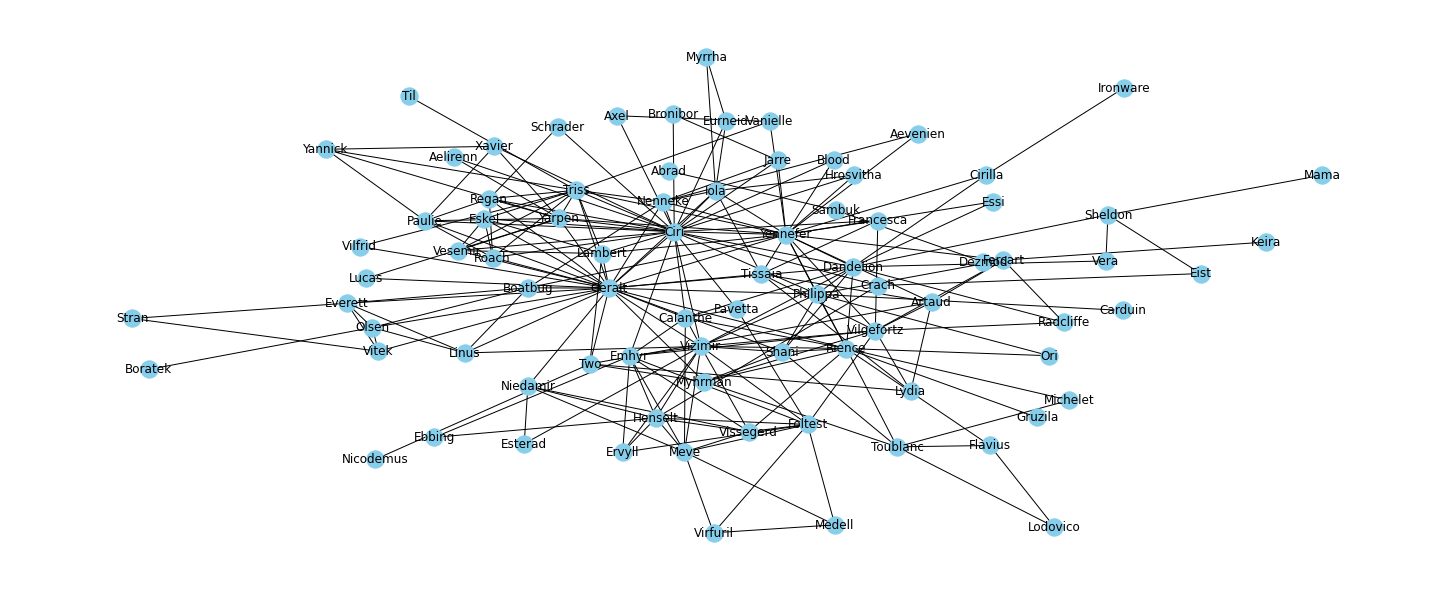

In [94]:
plt.figure(figsize = (20, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

In [96]:
from pyvis.network import Network
net = Network(notebook=True, width = "1000px", height = "700px", bgcolor = "#222222", font_color = "white")
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


<AxesSubplot:>

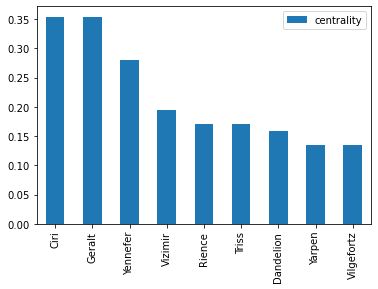

In [99]:
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns = ['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

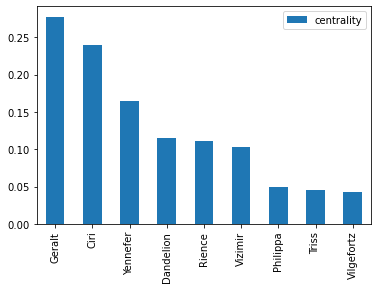

In [102]:
betweeness_dict = nx.betweenness_centrality(G)
betweeness_df = pd.DataFrame.from_dict(betweeness_dict, orient='index', columns = ['centrality'])
betweeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

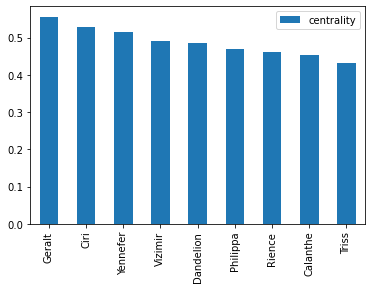

In [103]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns = ['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [104]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweeness_dict, 'degree_centrality')
nx.set_node_attributes(G, closeness_dict, 'degree_centrality')

In [106]:
import community as community_louvain

In [108]:
communities = community_louvain.best_partition(G)
communities

{'Ciri': 4,
 'Geralt': 1,
 'Dandelion': 2,
 'Yennefer': 6,
 'Cirilla': 2,
 'Vera': 2,
 'Pavetta': 5,
 'Calanthe': 5,
 'Ironware': 2,
 'Eist': 2,
 'Sheldon': 2,
 'Radcliffe': 7,
 'Dezmod': 0,
 'Sambuk': 0,
 'Abrad': 0,
 'Mama': 2,
 'Gruzila': 3,
 'Rience': 3,
 'Niedamir': 5,
 'Vizimir': 5,
 'Eskel': 4,
 'Roach': 4,
 'Vesemir': 4,
 'Triss': 4,
 'Lambert': 4,
 'Til': 4,
 'Two': 7,
 'Nenneke': 6,
 'Vanielle': 4,
 'Axel': 4,
 'Fercart': 7,
 'Keira': 7,
 'Artaud': 7,
 'Vilgefortz': 7,
 'Yarpen': 4,
 'Xavier': 4,
 'Yannick': 4,
 'Paulie': 4,
 'Regan': 4,
 'Lucas': 1,
 'Vilfrid': 1,
 'Schrader': 4,
 'Aelirenn': 4,
 'Everett': 1,
 'Iola': 6,
 'Boatbug': 1,
 'Linus': 1,
 'Olsen': 1,
 'Stran': 1,
 'Vitek': 1,
 'Boratek': 1,
 'Shani': 3,
 'Nicodemus': 7,
 'Ori': 3,
 'Philippa': 3,
 'Foltest': 5,
 'Henselt': 5,
 'Emhyr': 5,
 'Ebbing': 5,
 'Ervyll': 5,
 'Meve': 5,
 'Crach': 2,
 'Esterad': 5,
 'Vissegerd': 5,
 'Virfuril': 5,
 'Medell': 5,
 'Myhrman': 3,
 'Toublanc': 3,
 'Flavius': 3,
 'Lodovico': 3,


In [109]:
nx.set_node_attributes(G, communities, 'group')

In [131]:
com_net = Network(notebook=True, width = "1000px", height = "700px", bgcolor = "#222222", font_color = "white")
# node_degree = dict(G.degree)
# nx.set_node_attributes(G, node_degree, 'size')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
